In [20]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as  sns

In [21]:
data=pd.read_csv("SBI_Life_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,Female,27.900,0,smoke,southwest,16884.92400,yes
1,18,Male,33.770,1,no smoke,southeast,1725.55230,yes
2,28,Male,33.000,3,no smoke,southeast,4449.46200,no
3,33,Male,22.705,0,no smoke,northwest,21984.47061,no
4,32,Male,28.880,0,no smoke,northwest,3866.85520,yes


In [22]:
data.shape

(1338, 8)

In [23]:
data.sex

0       Female
1         Male
2         Male
3         Male
4         Male
         ...  
1333      Male
1334    Female
1335    Female
1336    Female
1337    Female
Name: sex, Length: 1338, dtype: object

In [24]:
data.count()

age               1338
sex               1338
bmi               1338
children          1338
smoker            1338
region            1338
charges           1338
insuranceclaim    1338
dtype: int64

In [25]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
data.isnull().any()

age               False
sex               False
bmi               False
children          False
smoker            False
region            False
charges           False
insuranceclaim    False
dtype: bool

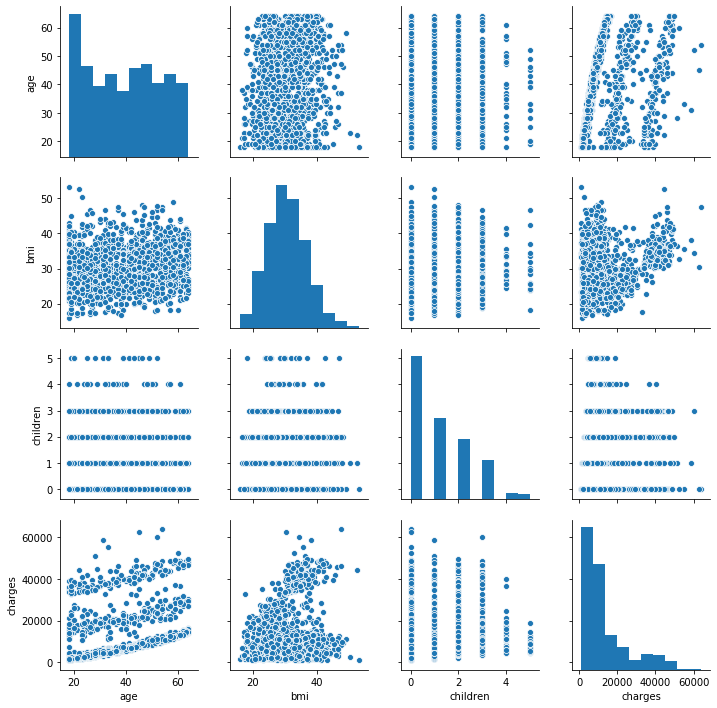

In [27]:
sns.pairplot(data)

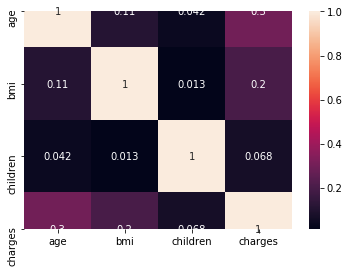

In [28]:
sns.heatmap(data.corr(), annot=True)

In [29]:
data['sex'].value_counts()

Male      676
Female    662
Name: sex, dtype: int64

In [37]:
pd.crosstab(data["sex"],data["region"],margins=True)

region,northeast,northwest,southeast,southwest,All
sex,,,,,
Female,161,164,175,162,662
Male,163,161,189,163,676
All,324,325,364,325,1338


In [30]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Number of children')

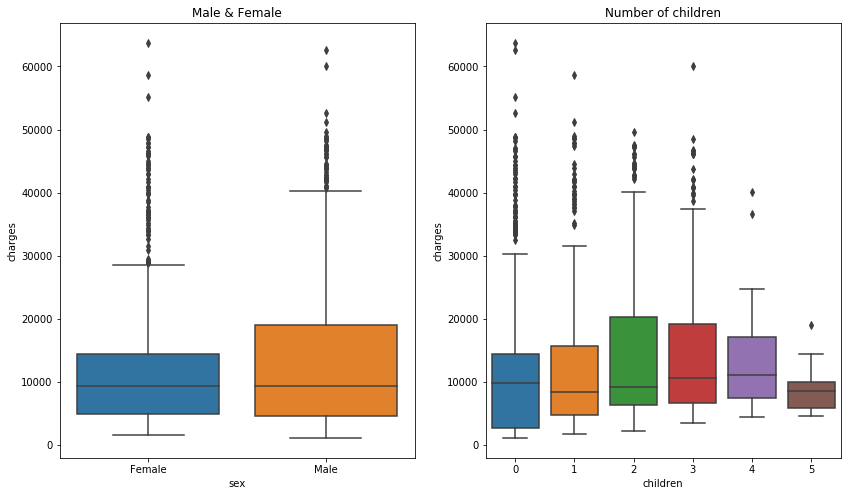

In [31]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
sns.boxplot(x = 'sex',y='charges', data = data, ax=ax[0])
ax[0].set_title('Male & Female')
sns.boxplot(x = 'children',y='charges', data = data, ax=ax[1])
ax[1].set_title('Number of children')

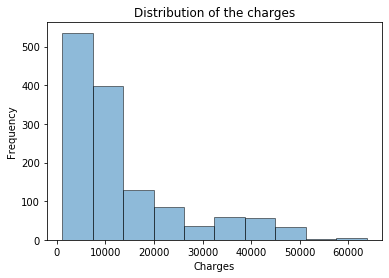

In [32]:
plt.hist(data.charges,bins = 10,alpha=0.5,histtype='bar',ec='black')
plt.title("Distribution of the charges")
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

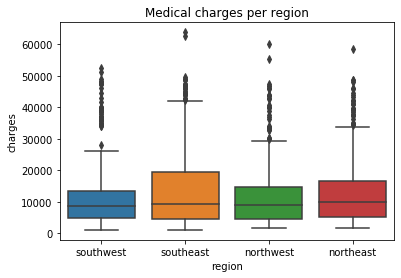

In [33]:
sns.boxplot(x=data.region,y=data.charges,data=data)
plt.title("Medical charges per region")
plt.show()

In [43]:
df_sorted = data.sort_values(['smoker','region'], ascending=False)
df_sorted[['smoker','region']].head(20)

,smoker,region
0,smoke,southwest
19,smoke,southwest
29,smoke,southwest
30,smoke,southwest
34,smoke,southwest
39,smoke,southwest
52,smoke,southwest
84,smoke,southwest
94,smoke,southwest
99,smoke,southwest


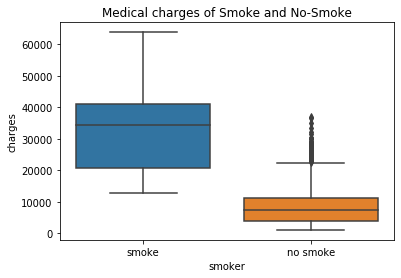

In [34]:
sns.boxplot(x=data.smoker,y=data.charges,data=data)
plt.title("Medical charges of Smoke and No-Smoke")
plt.show()

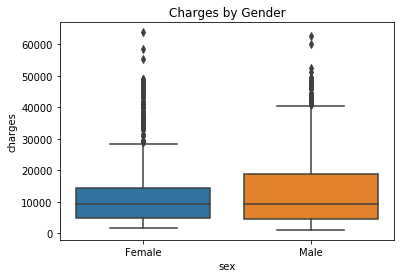

In [35]:
sns.boxplot(x=data.sex,y=data.charges,data=data)
plt.title("Charges by Gender")
plt.show()

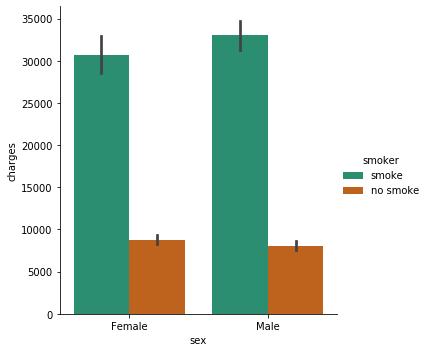

In [36]:
sns.catplot(x='sex',y='charges',hue='smoker',kind='bar',data=data, palette='Dark2')